In [3]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [15 pts]

In 2-4 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 


Primarily, we learned that silicon is a semiconductor that accelerates modern civilization. However, pure silicon, especially monocrystalline silicon, has very low electricity conductance and is hard to implement in actual circuits. Various elements such as nitrogen, boron, or phosphorate are injected into the silicon as impurities to increase conductance. We learned from general chemistry that a silicon atom could form four covalent bonds with nearby atoms, while impurities form 3 or 5 bonds. Hence, the injected impurities are not so stable as silicons. Since impurities with five valence electrons easily give out an electron to maintain a 4-bond structure, they are called **donor impurities**. Semiconductors with donor impurities are called **N-type Semiconductor**. On the contrary, impurities with three valence electrons are called **acceptor impurities** since they easily absorb electrons from other atoms.  Semiconductors with acceptor impurity are called **P-type Semiconductor**. In P-type Semiconductors, atoms losing electrons will consequently abosorbing electrons from others, which leads to the movement of positive charge. The positive charges are said to be carried by **holes**. Both holes and electrons are **charge carriers** since they transport charges. Both types of impurities can be doped into different regions of the same semiconductor. At the surface between P-type and N-type semiconductors, a particular region called **PN Juction** is formed, which leads to the asymmetric conductance.

PN junction is a special region formed at the contact surface between P and N type semiconductors, and it is sensitive to the condition of the semiconductor. Some carriers entered the jucntion recombined with opposite-charge carriers and are depleted. The average time between the generation and recombination of carriers is **life time**. Meanwhile, the leftover positively charged donor impurities and negatively charged acceptor impurities form an electric field within the junction, pointing from N to P region. Therefore, such region is also called **space charge region** or **depletion region**. Due to the gradient difference of carriers, non-recombined free carriers will **diffuse** to the opposite region, namely, electrons move to P region and holes move to N region. Such a charge exchange between P and N region of semiconductor leads to conductance, but it is easily modified by applied outer voltage. When $V_N > V_P$, the junction is **reverse biased** and the width of depletion region increases. Carriers can hardly go through the jucntion and lead to low conductance, then the semiconductor behaves as an insulator. On the contrary, when $V_P > V_N$, the junction is **forward biased** and the width of depletion region decreases. More carriers go through the junction before recombination, then the semiconductor behave as a conductor. Besides, carriers can be generated by energy like electricity and light, which also effect the conductance of materials.

From the discussion above, we introduce factors affecting the concentration of carriers: diffusion, drift caused by electric field, recombination, and generation by light. The relation between the factors above and the change of concentration can be described by continuity equation. Suppose that the concentration of carrier is $p$, then

$$
\frac{\partial p}{\partial t} = D_p\frac{\partial^2 p}{\partial x^2} - \mu_p E\frac{\partial p}{\partial x}-\mu_p p\frac{\partial E}{\partial x} + g_p -\frac{\Delta p}{\tau}\\
$$
where $D_p$ is the diffusion constant, $\mu_p$ is the mobility of carrier, $g_p$ is the generation rate, and $\tau$ is the life time of $p$. These parameters are determined by the material. By solving the equation, we wish to determine optimal parameters constrained by desired device properties, then we can determine the choice of materials.

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

In semiconductor device fabrication, choosing proper material can simplify structure of devices and enhance desired properties, and hence is of great importance. Discuss the solution of continuity equation in the context of certian electronic devices, we can find optimal solution for parameters, like diffusion constant, in the PDE. Then, we can choose materials with similar parameters will be appled to fabrication to enhance device performance. In this problem, we only focus on the equation at the equilibrium, which turn the PDE into an ODE, and its application as a photoelectronic diode detecting light intensity.

## Computational  Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



We will use shooting method to get a numerical solution and analyze the performance of device by quadrature.

In [4]:
# Provide complete installation or import information for external packages or modules here e.g.
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar


#pip install somepackage
# from somepackage import blah

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code. 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

The continuity equation depends on the application of devices, we will solve the computational problem for photoelectronic diodes.

Excess carrier can be generated in neutral N and P region of the semiconductor.  The distribution of excess minority carriers within P region can be calculated by **Bipolar Transportation Equation**, Which is:

$$
D_{n} \frac{\partial^{2}p}{\partial x^{2}}+G_{L}-\frac{p}{\tau_{p0}}=\frac{\partial p}{\partial t}
$$

Assume that the electric field in the neutral zone (non-space-charge region) is zero. We only focus the equilibrium state $\partial p/\partial t=0$. Now the continuity equation becomes an ODE:

$$
\frac{\mathrm{d}^{2}p}{\mathrm{d} x^{2}}-\frac{p}{L_{p}^{2}}=-\frac{G_{L}}{D_{p}}
$$
Where$L^2_p=D_p \tau_{p0}$.

The solution of this equation has two part: general solution and particular solution. The general solution can be obtained by following equation:

$$
\frac{d^{2}p_h}{d x^{2}}-\frac{p_h}{L_{p}^{2}}=0
$$
Where $p_h$ is the general solution, calculated by:
$$
p_h=A \mathrm{e}^{-x / L_{p}}+B \mathrm{e}^{x / L_{p}} \quad(x \geqslant 0)
$$

One boundary condition is that $p_h$ must be finite, which means for semiconductors have long length $B=0$.

The particular solution can be obtained by:
$$
-\frac{p_p}{L_{p}^{2}}=-\frac{G_{L}}{D_{p}}
$$

Therefore we could get:
$$
p_p=\frac{G_{L} L_{p}^{2}}{D_{p}}=\frac{G_{L}\left(D_{p} \tau_{p0}\right)}{D_{p}}=G_{L} \tau_{p0}
$$

*Written by Juanlang Shi, Data researched by Dawei Wang*

Hence, the equilibrium solution of $p$ is

$$
p = A\mathrm{e}^{-\frac{x}{L_p}} +G_L\tau_{p0}
$$

At $x = 0$, the total concentration of carriers is zero, then the excess carriers concentration is $-p_0$, where $p_0$ is the concentration of carrier in semiconductor. Hence, the solution is

$$
p = G_L\tau_{p0} - (G_L\tau_{p0} + p_0)\mathrm{e}^{-\frac{x}{L_p}}.
$$

Now we consider three material: silicon (Si), germanium (Ge), and gallium arsenide (GaAs). The parameters of these materials under 300K are

<table width="80%">
    <tr align="center"><th>$$\text{Material}$$</th> <th align="center">$$\text{Lifespan}$$</th> <th align="center">$$\text{Forbidden Bandwidth (eV)}$$</th></tr>
    <tr align="center"><td>$$\text{Si (N-type)}$$</td>           <td> $$30\times 10^{-6}\text{s}$$ </td> <td> $$1.12$$ </td> </tr>
    <tr align="center"><td>$$\text{Ge (N-type)}$$</td>           <td> $$140\times 10^{-6}\text{s}$$ </td> <td> $$0.66$$ </td> </tr>
    <tr align="center"><td>$$\text{GaAs (N-type)}$$</td>           <td> $$10\times 10^{-9}\text{s}$$ </td> <td> $$1.424$$ </td> </tr>
</table>

Now we suppose that $G_L = 10^{20}\text{cm}^{-3}\text{s}^{-1}$, then other parameters in ODE for each material are

<table width="80%">
    <tr align="center"><th>$$\text{Material}$$</th> <th align="center"> $$\text{Diffusion constant }(D)$$ </th></tr>
    <tr align="center"><td>$$\text{Si (N-type)}$$</td>           <td> $$6.47\ \text{cm}^{2}\text{s}^{-1}$$ </td> </tr>
    <tr align="center"><td>$$\text{Ge (N-type)}$$</td>           <td> $$44\ \text{cm}^{2}\text{s}^{-1}$$ </td> </tr>
    <tr align="center"><td>$$\text{GaAs (N-type)}$$</td>          <td> $$10\ \text{cm}^{2}\text{s}^{-1}$$ </td> </tr>
</table>

We also compute $p_0$ for each material. Let the concentration of donor impurities be $10^{13}, 10^{14}, 10^{15}$.

Let $n_0$, $p_0$ be the carrier concentrations, $N_C$ and $N_A$ are parameters of the materials. $E_g$ is the forbidden bandwidth of material, then we have

$$
n_0p_0 = N_AN_C \exp(-\frac{E_g}{kT}) = n_i^2\exp(-\frac{E_g}{kT}).
$$


In our study, we assume that the diode's length is 0.3 cm.

In [227]:
# Code by Juanlang Shi and Dawei Wang

# Compute p0 for each material
kT = 0.025852
Eg = [1.12, 0.66, 1.424]
GL = 10. ** 20.

# Product of NaNc
Ni = numpy.empty(3)
Ni[0] = (1.5 * 10. ** 10) ** 2 
Ni[1] = (1.8 * 10. ** 6) ** 2
Ni[2] = (2.4 * 10. ** 13) ** 2

# Lifespan
tau = [30. * 10. ** (-6.), 140. * 10. ** (-6.), 10. * 10. ** (-9.)]

# Given major carrier concentration
impurity = 10. ** 14

# Compute minor carrier concentration
Si_p0 = Ni[0] / impurity
Ge_p0 = Ni[1] / impurity
GaAs_p0 = Ni[2] / impurity

#print(Si_p0)

# Diffusion Constant
diff_const = [6.47, 44., 10.]

# Diffusion Length
Lp = numpy.empty(3)
for i in range(3):
    Lp[i] = tau[i] * diff_const[i]

#donor concentration
donor_conc = [10. * 10 ** 13, 10. * 10 ** 14, 10. * 10 ** 15]

x = numpy.linspace(0,0.3,100)

In [228]:
# Shooting method

def shoot_bvp(f, x, u_a, u_b, rtol=1.e-5, atol=1.e-9):
    """
    Solve the two-point boundary value problem on the interval x\in [a,b], using a shooting method that combines 
        scipy.integrate.solve_ivp and scipy.optimize.root_scalar and allows a range of boundary conditions
        
        
    parameters:
    -----------
    f: calleable 
        vector value function for righthand side of the ODE with interface f(t,u). returns ndarray of length 2
    x: numpy array
        coordinates array for solution  on interval [a,b] with x[0] = a, x[-1] = b
    u_a:  numpy array (length 2)
        provide initial boundary conditions  [u, u' ] at x=a
    u_b:  numpy array (length 2)
        target boundary condition at x = b
    i_a: integer
        index of known boundary condition at x = a.  i.e.
        if dirichlet conditions : i_a = 0 and u(a) is known  
        if neumann conditions   : i_a = 1 and u'(a) is known
        the complementary index is adjusted to match the boundary condition at b
    i_b: integer
        index of known boundary condition at x = b. i.e.
        if dirichlet conditions : i_b = 0 and u(b) is known  
        if neumann conditions   : i_b = 1 and u'(b) is known
        the complementary index is ignored at b
    rtol:  float
        relative tolerance
    atol:  float
        absolute tolerance
        
    returns:
    --------
    u: solution u(x) for x (uses dense_output from solve_ivp to interpolate solution onto x)
    """
    
# YOUR CODE HERE

    # Initial Conditions and guess
    u0_rhs = u_b
    u_lfs = u_a
    
    def convergence(guess):
        u0 = [u_lfs, guess] 
        sol = solve_ivp(f, [x[0], x[-1]], u0, rtol = rtol, atol = atol)
        
        u_end = sol.y[0,-1]
        return numpy.max(numpy.abs(u_end - u0_rhs))
    
    sol = root_scalar(convergence,x0 = 10 ** (18), x1 = 0,xtol=atol, rtol=rtol)
    guess = sol.root
    
    u0 = [u_lfs, guess]
            
    sol = solve_ivp(f, [x[0], x[-1]], u0, dense_output=True, rtol = rtol, atol = atol)
    u = sol.sol(x)[0]
    
    return u

# Define f for Silicon
def f0(x, v):
    return numpy.array([v[1], v[0] / Lp[0] - GL / diff_const[0]])

# Define f for Germanium
def f1(x, v):
    return numpy.array([v[1], v[0] / Lp[1]- GL / diff_const[1]])

# Define f for Gallium Arsenide
def f2(x, v):
    return numpy.array([v[1], v[0] / Lp[2] - GL / diff_const[2]])

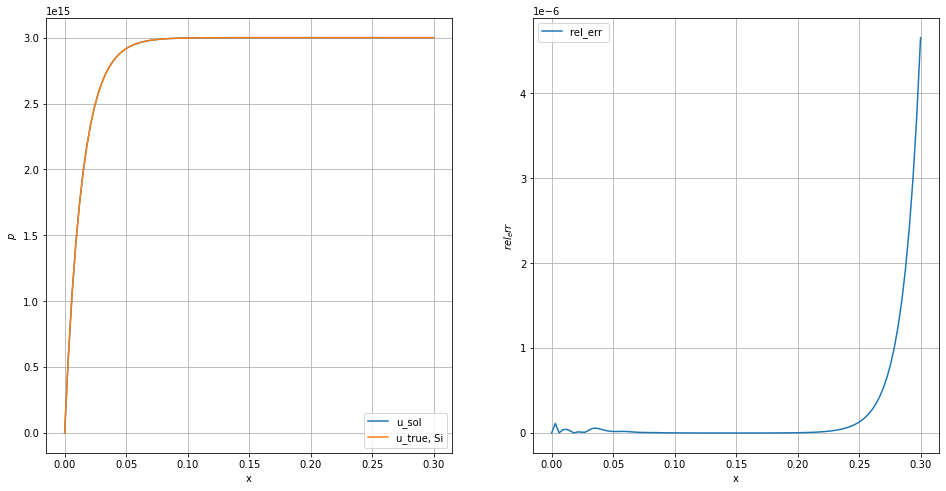

In [255]:
# Define initial conditions for Silicon
u_a = numpy.empty(3)
u_a[0] = -Si_p0
u_a[1] = -Ge_p0
u_a[2] = -GaAs_p0
u_b = numpy.empty(3)
u_b[0] = GL * tau[0]
u_b[1] = GL * tau[1]
u_b[2] = GL * tau[2]

# Solution for Silicon
sol_Si = shoot_bvp(f0, x, u_a[0], u_b[0], rtol=1.e-6, atol=1.e-9)
sol_Ge = shoot_bvp(f1, x, u_a[1], u_b[1], rtol=1.e-6, atol=1.e-9)
sol_GaAs = shoot_bvp(f2, x, u_a[2], u_b[2], rtol=1.e-6, atol=1.e-9)

# Plot the figure for silicon
fig = plt.figure(figsize=(16,8))
axes = fig.add_subplot(1, 2, 1)
axes.plot(x, sol_Si, label="u_sol")

#Exact solution
p = lambda x: tau[0] * GL - (GL * tau[0] + Si_p0) * numpy.exp(- x / numpy.sqrt(Lp[0]))
axes.plot(x, p(x), label="u_true, Si")


axes.set_xlabel("x")
axes.set_ylabel("$p$")
axes.legend(loc='best')
axes.grid()

# Plot the rel_err 
rel_err=numpy.empty(100)
for i in range(100):
    rel_err[i] = numpy.abs(sol_Si[i] - p(x[i]))/numpy.abs(p(x[i]))
axes = fig.add_subplot(1, 2, 2)
axes.plot(x, rel_err , label="rel_err ")

axes.set_xlabel("x")
axes.set_ylabel("$rel_err $")
axes.legend(loc='best')
axes.grid()

Now we test the solution.

In [230]:
#  test the solution against the true solution and pass if relative error < 1.e-6

rel_err = numpy.linalg.norm(sol_Si - p(x))/numpy.linalg.norm(p(x))
print('relative error = {}'.format(rel_err))

assert(rel_err < 1.e-6)
print('success')

relative error = 8.150066303396458e-07
success


Now we plot solutions for all materials. 

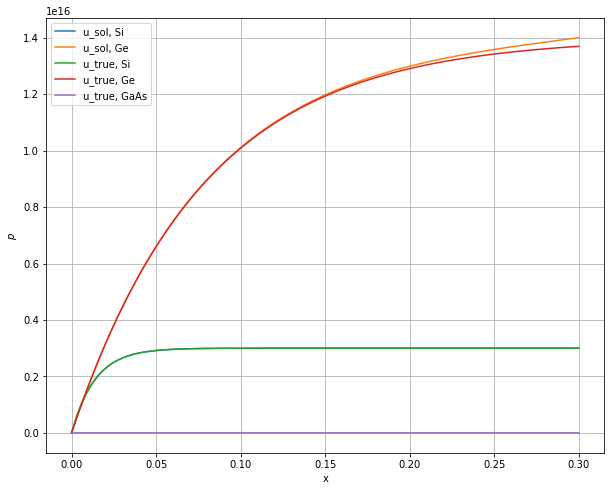

In [238]:
fig = plt.figure(figsize=(10,8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, sol_Si, label="u_sol, Si")
axes.plot(x, sol_Ge, label="u_sol, Ge")
#axes.plot(x, sol_GaAs, label="u_sol, GaAs")

#Exact solution
p = lambda x: tau[0] * GL - (GL * tau[0] + Si_p0) * numpy.exp(- x / numpy.sqrt(Lp[0]))
axes.plot(x, p(x), label="u_true, Si")
p = lambda x: tau[1] * GL - (GL * tau[1] + Ge_p0) * numpy.exp(- x / numpy.sqrt(Lp[1]))
axes.plot(x, p(x), label="u_true, Ge")
p = lambda x: tau[2] * GL - (GL * tau[2] + GaAs_p0) * numpy.exp(- x / numpy.sqrt(Lp[2]))
axes.plot(x, p(x), label="u_true, GaAs")

axes.set_xlabel("x")
axes.set_ylabel("$p$")
axes.legend(loc='best')
axes.grid()

In this plot, we only show the solution of silicon and germanium. The lifespan of holes in n-GaAs is too short and it is underflow. In the following analysis, we only compare the performance of Si and Ge devices. We see the difference of $p$ between Ge and Si is large. We use the left rectangular rule in quadrature. 

In [242]:
# Quadrature by Left-rectagular Rule
def I_left(x, sol, a, b):
    """ Left rectangle rule"""
    delta = x[b] - x[a]
    f_eval = sol[a]
    I = f_eval * delta
    return I

def quadN(x, sol, N = len(x)):
    """ 
    integrate a function f over the interval x in [a,b] using 
    an extended quadrature rule that implements a single interval
    quadrature rule over N panels of width (a - b)/N 
        
    Parameters:
    -----------
        
    f:  function f(x) (type real)
    a: real
        left boundary of interval
    b: real
        right boundary of interval
    N: integer
        number of panels to subdivide [a,b]
    method:  quadrature function with interface I(f, x0, x1) (real)
        returns quadrature approximation for subinterval [x0, x1]
        defaults to a midpoint rule
            
    Returns:
    --------
    I_N:  extended quadrature approximation of \int_a^b f(x) dx
        
    """
    #Find the subintervals
    t = numpy.zeros(len(sol))
    t[0] = sol[0]
    delta = (x[-1] - x[0]) / len(sol)
    
    I_N = 0

    for i in range(N-1):
        I = I_left(x, sol, i, i+1)
        I_N = I_N + I
    
    return I_N


In [246]:
J_Si = quadN(x, sol_Si, N = len(x))

J_Ge = quadN(x, sol_Ge, N = len(x))

if J_Si > J_Ge:
    print("Si is more sensitive than Ge")
elif J_Si < J_Ge:
    print("Ge is more sensitive than Si")
else:
    print("Both materials are eligible")

Ge is more sensitive than Si


## Discussion [10 pts]

Discuss the results of your code including 
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


Within the computation process, we’ve met an important underflow problem that stopped our computation in the third material GaAs. Due to the extreme short lifespan of GaAs, we’ve reached the computational limit. Thus our attempt is failed on GaAs unless use a system with much more digits.

Besides the third material, our first two materials give quite reasonable result. The numerical value we get from shooting method is close enough to the exact value from the original equation.

Since the idea of using shooting method to compute numerical solution of carrier concentration is proven valid, we can now extend this method to all other materials. The only loophole of this method is it cannot deal with materials with extreme short lifespan. Moreover, this project is to set up the materials and their properties first and then calculate the carrier concentration, but we can also fix some parameters of the equation, such as mobility, to find optimal material property in order to identify the best material to use.